# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | loango
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | melo
Processing Record 5 of Set 1 | nayoro
Processing Record 6 of Set 1 | pokrovsk
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | guarapari
Processing Record 11 of Set 1 | laguna
Processing Record 12 of Set 1 | utrik
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | port augusta
Processing Record 15 of Set 1 | iquique
Processing Record 16 of Set 1 | maceio
Processing Record 17 of Set 1 | mountain home
Processing Record 18 of Set 1 | guatrache
Processing Record 19 of Set 1 | mount gambier
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | la passe
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 of Set 1 |

Processing Record 43 of Set 4 | upata
Processing Record 44 of Set 4 | coron
Processing Record 45 of Set 4 | carutapera
Processing Record 46 of Set 4 | solnechnyy
Processing Record 47 of Set 4 | nsanje
Processing Record 48 of Set 4 | swift current
Processing Record 49 of Set 4 | alice springs
Processing Record 0 of Set 5 | lata
Processing Record 1 of Set 5 | sao desiderio
Processing Record 2 of Set 5 | fort william
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | nieuw amsterdam
Processing Record 6 of Set 5 | kerikeri
Processing Record 7 of Set 5 | salaqi
Processing Record 8 of Set 5 | inhambane
Processing Record 9 of Set 5 | bamboo flat
Processing Record 10 of Set 5 | fraccionamiento ciudad olmeca
Processing Record 11 of Set 5 | tejen
Processing Record 12 of Set 5 | camana
Processing Record 13 of Set 5 | xining
Processing Record 14 of Set 5 | san patricio
Processing Record 15 of Set 5 | aljezur
Processing Record 16 of Set 5 | i

Processing Record 35 of Set 8 | scarborough
Processing Record 36 of Set 8 | lerwick
Processing Record 37 of Set 8 | quimili
Processing Record 38 of Set 8 | rebola
Processing Record 39 of Set 8 | suzun
Processing Record 40 of Set 8 | wynyard
Processing Record 41 of Set 8 | ongjin
Processing Record 42 of Set 8 | sisimiut
Processing Record 43 of Set 8 | wajir
Processing Record 44 of Set 8 | kolonia town
Processing Record 45 of Set 8 | stephenville
Processing Record 46 of Set 8 | jacmel
Processing Record 47 of Set 8 | turriff
Processing Record 48 of Set 8 | acapulco de juarez
Processing Record 49 of Set 8 | fatima
Processing Record 0 of Set 9 | baki
Processing Record 1 of Set 9 | barsi
Processing Record 2 of Set 9 | prairie view
Processing Record 3 of Set 9 | buraydah
Processing Record 4 of Set 9 | constitucion
Processing Record 5 of Set 9 | fereydun kenar
Processing Record 6 of Set 9 | beaumont
Processing Record 7 of Set 9 | karratha
Processing Record 8 of Set 9 | kristiansund
Processing 

Processing Record 27 of Set 12 | viana do castelo
Processing Record 28 of Set 12 | ha'il
Processing Record 29 of Set 12 | bousso
Processing Record 30 of Set 12 | shaoguan
Processing Record 31 of Set 12 | mahenge
Processing Record 32 of Set 12 | vaxjo
Processing Record 33 of Set 12 | howrah
Processing Record 34 of Set 12 | kolonia
Processing Record 35 of Set 12 | sorong
Processing Record 36 of Set 12 | sao gabriel da cachoeira
Processing Record 37 of Set 12 | clearwater
Processing Record 38 of Set 12 | leh
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,32.49,93,100,4.92,CL,1684625780
1,loango,-4.6719,11.8312,75.06,88,99,2.48,CG,1684625792
2,albany,42.6001,-73.9662,64.72,92,100,1.01,US,1684625792
3,melo,-32.3667,-54.1833,58.95,89,100,8.43,UY,1684625792
4,nayoro,44.3506,142.4578,51.82,85,100,3.15,JP,1684625792


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,32.49,93,100,4.92,CL,1684625780
1,loango,-4.6719,11.8312,75.06,88,99,2.48,CG,1684625792
2,albany,42.6001,-73.9662,64.72,92,100,1.01,US,1684625792
3,melo,-32.3667,-54.1833,58.95,89,100,8.43,UY,1684625792
4,nayoro,44.3506,142.4578,51.82,85,100,3.15,JP,1684625792


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

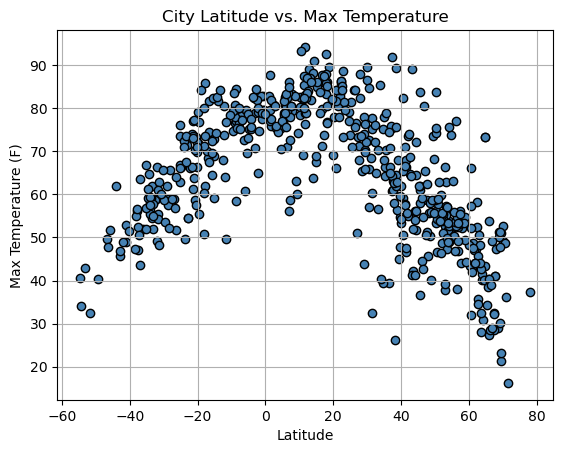

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

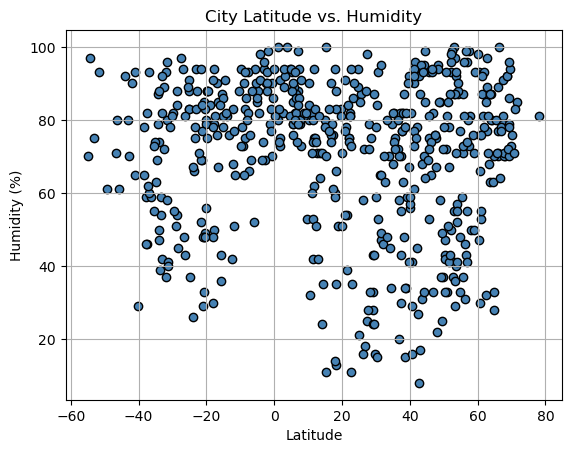

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

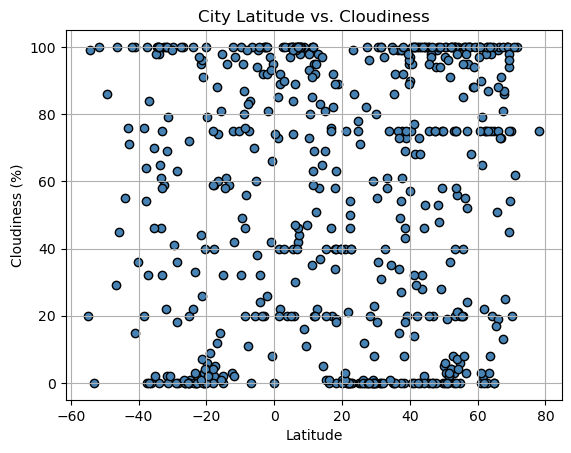

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

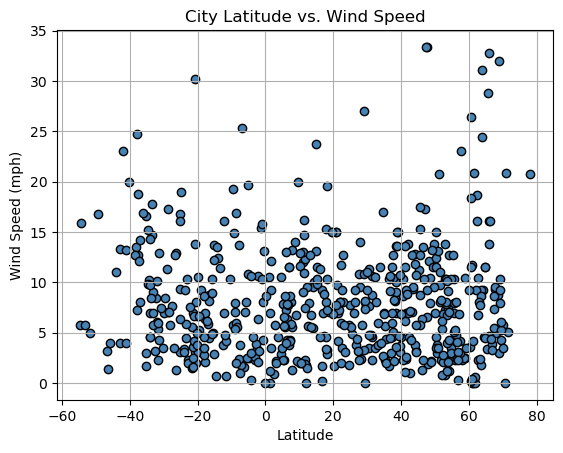

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        
        # Run regression on hemisphere weather data
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        
        # Calculate the regression line "y values" from the slope and intercept
        regress_values = x_values * slope + intercept
        
        # Get the equation of the line
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

        # Create a scatter plot and plot the regression line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")

        # Annotate the text for the line equation and add its coordinates
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.title(title)
        plt.show()
   

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,64.72,92,100,1.01,US,1684625792
4,nayoro,44.3506,142.4578,51.82,85,100,3.15,JP,1684625792
5,pokrovsk,48.2820,37.1758,55.56,95,53,12.10,UA,1684625792
6,thompson,55.7435,-97.8558,50.16,37,20,10.36,CA,1684625793
10,laguna,38.4210,-121.4238,89.31,48,0,6.91,US,1684625794


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,32.49,93,100,4.92,CL,1684625780
1,loango,-4.6719,11.8312,75.06,88,99,2.48,CG,1684625792
3,melo,-32.3667,-54.1833,58.95,89,100,8.43,UY,1684625792
7,adamstown,-25.0660,-130.1015,75.96,83,72,16.82,PN,1684625777
8,atafu village,-8.5421,-172.5159,84.42,75,46,16.91,TK,1684625782


###  Temperature vs. Latitude Linear Regression Plot

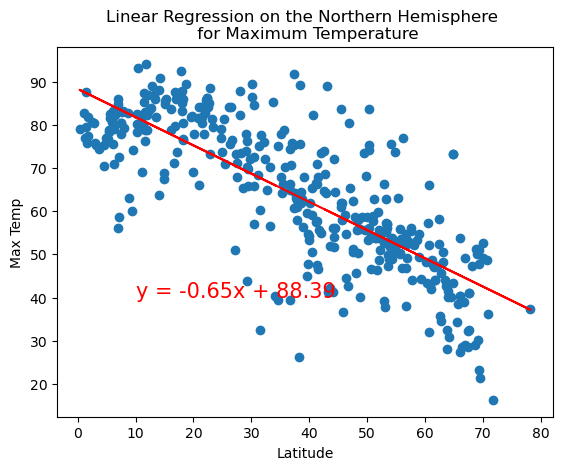

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


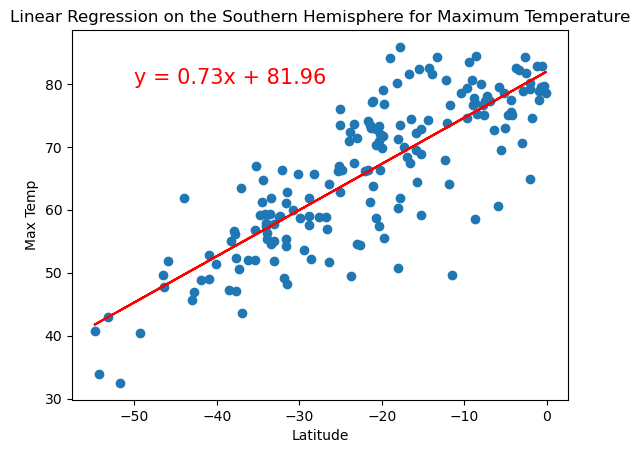

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,80))

**Discussion about the linear relationship:** In the northern hemisphere, as we move farther from the equator, the temperature decreases. This is shown by a negative relationship with a 77% fit between temperature and latitude. Conversely, in the southern hemisphere, as we get closer to the equator, the temperature rises, displaying a positive relationship that has a 51% fit.

### Humidity vs. Latitude Linear Regression Plot

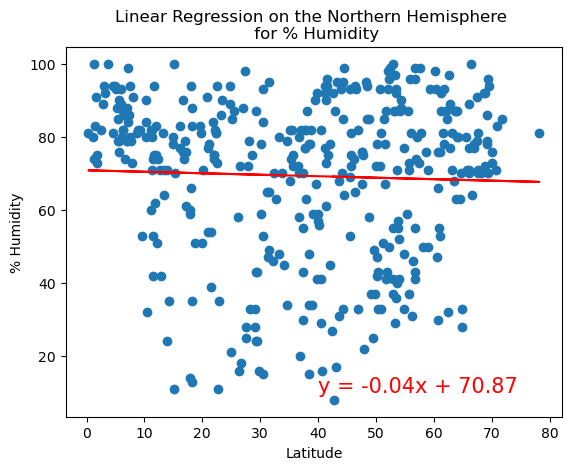

In [17]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

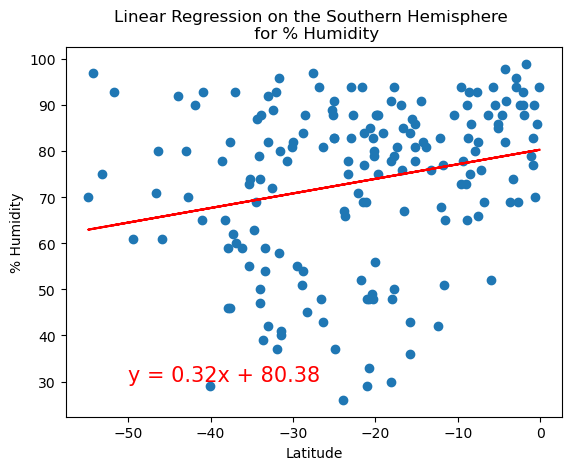

In [18]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))


**Discussion about the linear relationship:** The linear regression model for both Northern and Southern Hemispheres shows a weak relationship between humidity and latitude. The r-squared values are 0.04 and 0.01, respectively. This means that latitude does not explain humidity very well.

### Cloudiness vs. Latitude Linear Regression Plot

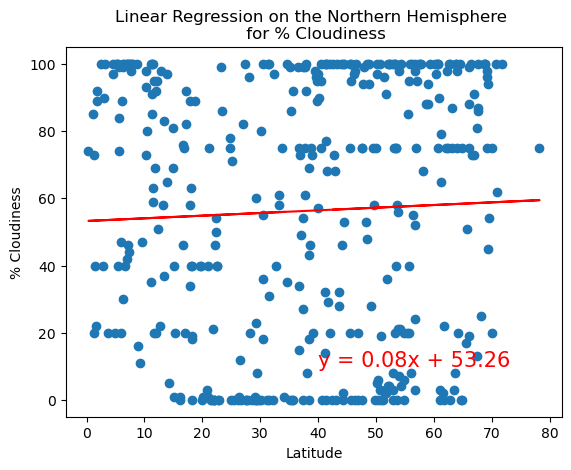

In [19]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

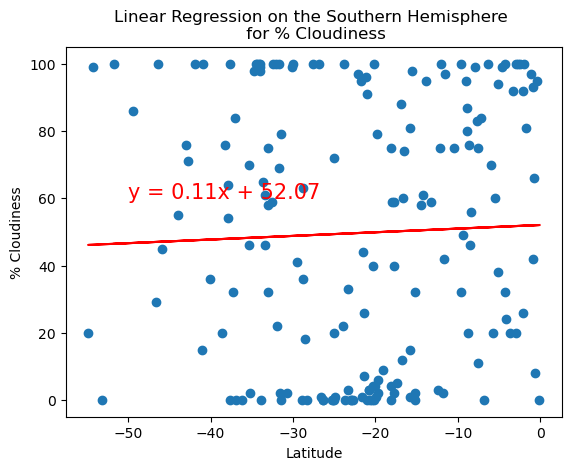

In [20]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


**Discussion about the linear relationship:** For both the Northern and Southern Hemispheres, the linear regression model shows a weak relationship between cloudiness and latitude. The r-squared values are 0.01 and 0.02, respectively. This means that latitude does not explain cloudiness very well either.

### Wind Speed vs. Latitude Linear Regression Plot

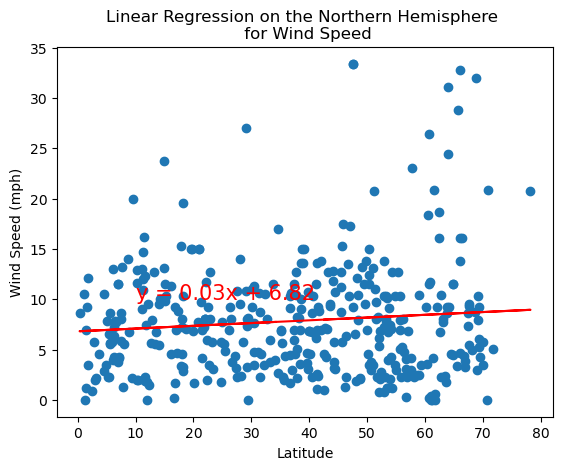

In [21]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(10,10))

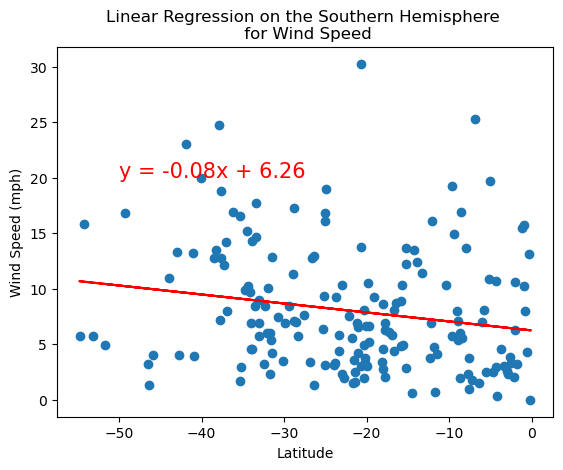

In [22]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-50,20))

**Discussion about the linear relationship:** Linear regression for wind speed on both hemispheres show a slightly stronger, but still weak correlation. The Northern Hemisphere displays a weak positive correlation, whereas the Southern Hemisphere shows a weak negative correlation. The r-squared values are 0.04 and 0.06, respectively. This means that latitude does not explain wind speed very well either.